#  Decision Trees

In [36]:
# Initial imports
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing Loans Encoded Data

In [37]:
# Loading data
file_path = "C:/Users/VivoBook/Desktop/Classwork/capstoneproject-2022/Database/merged_demo.csv"
merged_demo = pd.read_csv(file_path)
merged_demo.head()

,county,year,number_sales,sales_percentage,population,pop_percentage,county_count,state_count,total_incentives,county_max,...,previous_evs,household_income,importance_of_gge,homeowner,education,commute_distance,age,gender,number_of_vehicles,annual_miles
0,Alameda,2015,5536,8.65,1630159,4.19,0,6,6,0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26
1,Alameda,2016,5327,7.35,1647332,4.21,0,6,6,0,...,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10
2,Alameda,2017,7056,7.61,1659750,4.22,0,6,6,0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
3,Alpine,2017,1,0.00,1211,0.00,0,6,6,0,...,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44
4,Amador,2015,15,0.02,36905,0.09,0,6,6,0,...,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26


In [38]:
merged_demo = merged_demo.drop(columns=["county", "sales_percentage"])

In [39]:
# Define features set
X = merged_demo.drop("number_sales", axis=1)
y = merged_demo["number_sales"]

In [40]:
# Split into Train and Test sets, StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=75, train_size=0.80)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134, 19)
(34, 19)
(134,)
(34,)


## Fitting the Random Forest Model

In [42]:
# Create and fit the random forest regressor instance
rf_model = RandomForestRegressor(random_state=75, n_estimators=500).fit(X_train_scaled, y_train)

## Making Predictions Using the Data

In [43]:
# Making predictions using the testing data
y_pred = rf_model.predict(X_test_scaled)
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9710640748589472
Testing Data Score: 0.8393753309916875


## Rank Importance of Features

In [44]:
# Calculate feature importance in the Random Forest model.
feature_importances = rf_model.feature_importances_
feature_importances

array([0.00272921, 0.39577503, 0.41829469, 0.05728915, 0.        ,
       0.08019266, 0.01433757, 0.        , 0.01101322, 0.        ,
       0.00281116, 0.0024021 , 0.00230833, 0.00203632, 0.00193691,
       0.00230974, 0.0009503 , 0.00275643, 0.00285717])

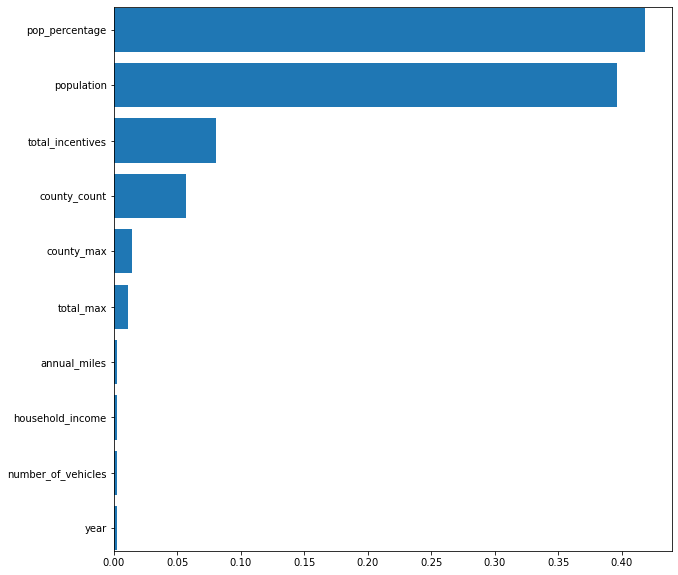

In [45]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols[-10:], width=width[-10:])

plt.show()

# Visualize regression results

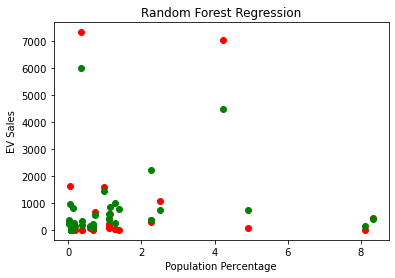

In [48]:
# Visualize model’s predictions for pop_percentage
# Real values = red, predicted = green
# Code found here: https://cnvrg.io/random-forest-regression/
plt.scatter(X_test['pop_percentage'].values, y_test, color = 'red')
plt.scatter(X_test['pop_percentage'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Population Percentage')
plt.ylabel('EV Sales')
plt.show() 

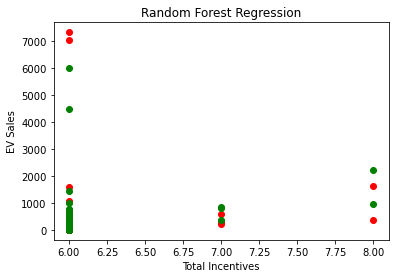

In [49]:
# Visualize model’s predictions for total_incentives
# Real values = red, predicted = green
plt.scatter(X_test['total_incentives'].values, y_test, color = 'red')
plt.scatter(X_test['total_incentives'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Total Incentives')
plt.ylabel('EV Sales')
plt.show() 

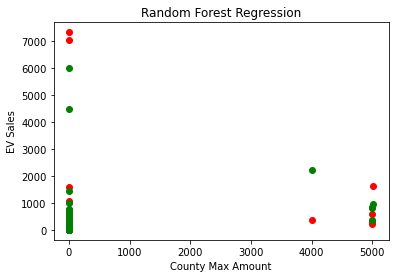

In [50]:
# Visualize model’s predictions for county_max
# Real values = red, predicted = green
plt.scatter(X_test['county_max'].values, y_test, color = 'red')
plt.scatter(X_test['county_max'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('County Max Amount')
plt.ylabel('EV Sales')
plt.show() 

# Make pipeline to preprocess the data for stacked predictors

In [56]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Maria Telenczuk    <https://github.com/maikia>
# License: BSD 3 clause

from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_selector(X)

[]

In [57]:
num_selector(X)

['year',
 'population',
 'pop_percentage',
 'county_count',
 'state_count',
 'total_incentives',
 'county_max',
 'state_max',
 'total_max',
 'previous_evs',
 'household_income',
 'importance_of_gge',
 'homeowner',
 'education',
 'commute_distance',
 'age',
 'gender',
 'number_of_vehicles',
 'annual_miles']

In [58]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D248>),
                                ('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D208>)])

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)
linear_preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicator=True))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D248>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D208>)])

# Stack of predictors on a single data set

In [60]:
from sklearn.linear_model import LassoCV

lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
lasso_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(add_indicator=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D248>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D208>)])),
                ('lassocv', LassoCV())])

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=42))
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D248>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D208>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [62]:
from sklearn.ensemble import HistGradientBoostingRegressor

gbdt_pipeline = make_pipeline(
    tree_preprocessor, HistGradientBoostingRegressor(random_state=0)
)
gbdt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D248>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D208>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(random_state=0))])

In [66]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ("Random Forest", rf_pipeline),
    ("Lasso", lasso_pipeline),
    ("Gradient Boosting", gbdt_pipeline),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor

StackingRegressor(estimators=[('Random Forest',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('simpleimputer',
                                                                                 SimpleImputer(add_indicator=True),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E6E92D248>),
                                                                                ('ordinalencoder',
                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                unknown_value=-1),
                                                                                 <sklearn.com...
                                                       

# Measure and plot the results

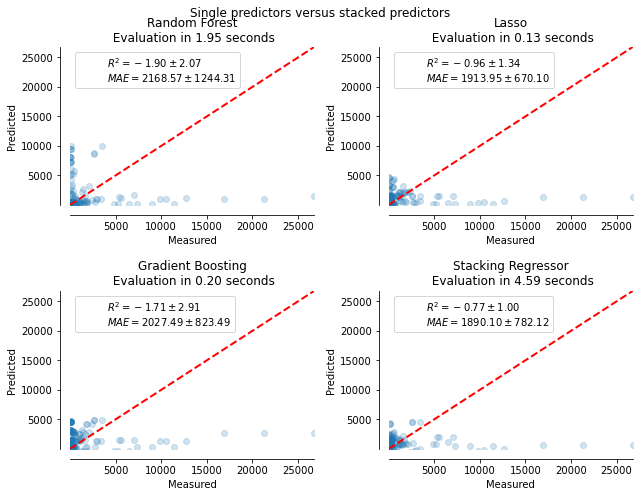

In [67]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")
    title = title + "\n Evaluation in {:.2f} seconds".format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    start_time = time.time()
    score = cross_validate(
        est, X, y, scoring=["r2", "neg_mean_absolute_error"], n_jobs=2, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=2, verbose=0)

    plot_regression_results(
        ax,
        y,
        y_pred,
        name,
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.mean(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.mean(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
        elapsed_time,
    )

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Gradient Boosting Regressor

In [77]:
# Try for better results based off stacked predictors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
for i in [0.1, 0.01, 0.001]:
    for j in [100, 250, 500, 750]:
        gbr = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        gbr = gbr.fit(X_train_scaled, y_train)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        mse = mean_squared_error(y_test, gbr.predict(X_test_scaled))
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

        pred2 = gbr.predict(X_test_scaled)
        print("Accuracy on training set: %.3f" % gbr.score(X_train_scaled, y_train))
        print("Accuracy on test set: %.3f" % gbr.score(X_test_scaled, y_test))
        print("==============================================")

predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=100
The mean squared error (MSE) on test set: 249738.8683
Accuracy on training set: 0.996
Accuracy on test set: 0.912
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=250
The mean squared error (MSE) on test set: 226573.9986
Accuracy on training set: 1.000
Accuracy on test set: 0.920
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=500
The mean squared error (MSE) on test set: 218966.3994
Accuracy on training set: 1.000
Accuracy on test set: 0.923
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=750
The mean squared error (MSE) on test set: 233629.8403
Accuracy on training set: 1.000
Accuracy on test set: 0.917
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=100
The mean squared error (MSE) on test set: 2833034.4060
Accuracy on training set: 0.690
Accuracy on test set: -0.001
predict output fo

In [79]:
# Check best results in dataframe
X_test.loc[:, ['number_sales']] = pred2
X_test.head()

,year,population,pop_percentage,county_count,state_count,total_incentives,county_max,state_max,total_max,previous_evs,household_income,importance_of_gge,homeowner,education,commute_distance,age,gender,number_of_vehicles,annual_miles,number_sales
165,2015,75748,0.19,0,6,6,0,25500,25500,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26,1217.995166
141,2015,435902,1.12,0,6,6,0,25500,25500,1,204219.01,1.57,0.89,3.32,18.52,50.99,0.27,2.55,13170.26,1119.898826
63,2017,154238,0.39,0,6,6,0,25500,25500,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44,1119.898826
50,2016,32309,0.08,0,6,6,0,25500,25500,1,216141.50,1.61,0.85,3.34,18.83,49.27,0.25,2.41,12477.10,866.078245
82,2017,438011,1.11,0,6,6,0,25500,25500,1,185496.29,1.75,0.80,3.37,18.76,48.95,0.27,2.31,13239.44,1119.898826


In [88]:
# Testing parameters that give best results
gbt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500)

gbt = gbt.fit(X_train_scaled, y_train)
print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
mse = mean_squared_error(y_test, gbt.predict(X_test_scaled))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

pred2 = gbt.predict(X_test_scaled)
print("The best accuracy on training set: %.3f" % gbt.score(X_train_scaled, y_train))
print("The best accuracy on test set: %.3f" % gbt.score(X_test_scaled, y_test))

predict output for GradientBoostingRegressor: learning_rate=0.001, n_estimators=750
The mean squared error (MSE) on test set: 223122.3760
The best accuracy on training set: 1.000
The best accuracy on test set: 0.921
